In [2]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from minisom import MiniSom

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [18]:
df_daily = pd.read_csv("daily_dataset.csv")
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510433 entries, 0 to 3510432
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   LCLid          object 
 1   day            object 
 2   energy_median  float64
 3   energy_mean    float64
 4   energy_max     float64
 5   energy_count   int64  
 6   energy_std     float64
 7   energy_sum     float64
 8   energy_min     float64
dtypes: float64(6), int64(1), object(2)
memory usage: 241.0+ MB


In [19]:
df_daily.head()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000131,2011-12-15,0.4850,0.432045,0.868,22,0.239146,9.505,0.072
1,MAC000131,2011-12-16,0.1415,0.296167,1.116,48,0.281471,14.216,0.031
2,MAC000131,2011-12-17,0.1015,0.189812,0.685,48,0.188405,9.111,0.064
3,MAC000131,2011-12-18,0.1140,0.218979,0.676,48,0.202919,10.511,0.065
4,MAC000131,2011-12-19,0.1910,0.325979,0.788,48,0.259205,15.647,0.066


In [20]:
df_filter = df_daily.copy()
df_filter['day'] = pd.to_datetime(df_filter['day'])  # Asegurándose de que la columna 'day' es de tipo datetime
df_2013 = df_filter[df_filter['day'].dt.year == 2013]

In [21]:
len(df_2013.LCLid.unique())

5528

In [22]:
df_2013 = df_2013[['LCLid', 'day', 'energy_sum']]
df_2013.day = pd.to_datetime(df_2013.day,format='%Y-%m-%d')

In [23]:
df_2013.head()

,LCLid,day,energy_sum
383,MAC000131,2013-01-01,15.226
384,MAC000131,2013-01-02,11.988
385,MAC000131,2013-01-03,11.002
386,MAC000131,2013-01-04,11.446
387,MAC000131,2013-01-05,7.602


In [24]:
df_2013 = df_2013.sort_values(by='day', ascending=True)

In [25]:
df_2013.head()

,LCLid,day,energy_sum
383,MAC000131,2013-01-01,15.226
417351,MAC005507,2013-01-01,12.641
2735248,MAC000785,2013-01-01,20.313
2734569,MAC000775,2013-01-01,17.298
418171,MAC000245,2013-01-01,35.068


In [26]:
df_2013.isna().sum()

LCLid         0
day           0
energy_sum    7
dtype: int64

In [31]:
df_2013.fillna(0, inplace=True)

In [32]:
df_2013.isna().sum()

LCLid         0
day           0
energy_sum    0
dtype: int64

In [33]:
df_clustering = df_2013.copy()

In [34]:
df_clustering = df_clustering.pivot(index='LCLid', columns='day', values='energy_sum')
df_clustering

day,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06,2013-01-07,2013-01-08,2013-01-09,2013-01-10,...,2013-12-22,2013-12-23,2013-12-24,2013-12-25,2013-12-26,2013-12-27,2013-12-28,2013-12-29,2013-12-30,2013-12-31
LCLid,,,,,,,,,,,,,,,,,,,,,
MAC000002,10.800,13.300,10.074,9.857,11.171,10.293,9.439,11.640,15.259,10.740,...,12.025,6.721,4.781,4.650,4.706,9.122,13.658,14.982,15.082,13.746
MAC000003,18.734,19.980,23.522,20.949,22.061,39.806,40.185,40.282,19.656,40.258,...,11.767,10.288,34.059,33.797,31.277,31.533,10.564,9.746,10.722,10.015
MAC000004,1.753,1.916,1.722,1.747,1.614,1.858,1.607,1.743,1.712,1.741,...,1.619,1.734,1.826,1.706,1.869,1.758,1.918,1.734,1.829,1.913
MAC000005,4.339,5.700,5.177,6.188,5.369,11.436,5.689,3.753,5.092,5.240,...,5.280,4.784,5.241,9.048,3.257,6.935,5.680,2.976,4.998,5.222
MAC000006,0.500,0.496,0.494,0.495,0.499,0.498,0.489,1.854,3.184,4.451,...,3.865,3.815,4.327,4.947,3.936,3.412,2.940,3.120,4.358,3.307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MAC005561,8.899,8.204,6.287,7.732,8.689,9.017,9.460,11.039,8.050,10.177,...,9.791,12.178,9.732,15.736,11.592,9.446,9.443,11.572,9.758,9.016
MAC005562,10.841,9.727,8.290,9.681,9.314,9.202,9.145,7.469,8.173,8.599,...,12.912,13.259,24.519,14.370,13.373,14.532,10.706,14.832,18.217,17.144
MAC005564,4.926,5.126,4.017,4.214,3.493,5.064,3.526,4.953,5.419,3.833,...,3.569,5.088,6.646,4.439,4.173,5.206,3.482,3.529,3.473,4.516


In [35]:
df_clustering.isna().sum()

day
2013-01-01     15
2013-01-02     16
2013-01-03     16
2013-01-04     14
2013-01-05     14
             ... 
2013-12-27    424
2013-12-28    425
2013-12-29    425
2013-12-30    425
2013-12-31    429
Length: 365, dtype: int64

In [36]:
df_clustering = df_clustering.T.fillna(df_clustering.mean(axis=1)).T

In [38]:
df_clustering.isna().sum()

day
2013-01-01    0
2013-01-02    0
2013-01-03    0
2013-01-04    0
2013-01-05    0
             ..
2013-12-27    0
2013-12-28    0
2013-12-29    0
2013-12-30    0
2013-12-31    0
Length: 365, dtype: int64

In [39]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clustering)
df_clustering_scaled = pd.DataFrame(scaled_data, index=df_clustering.index, columns=df_clustering.columns)

In [40]:
df_clustering_scaled

day,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06,2013-01-07,2013-01-08,2013-01-09,2013-01-10,...,2013-12-22,2013-12-23,2013-12-24,2013-12-25,2013-12-26,2013-12-27,2013-12-28,2013-12-29,2013-12-30,2013-12-31
LCLid,,,,,,,,,,,,,,,,,,,,,
MAC000002,-0.100562,0.121649,-0.134846,-0.159774,-0.053210,-0.205771,-0.220057,0.041673,0.400032,-0.119994,...,0.014900,-0.493063,-0.666061,-0.619413,-0.601437,-0.226643,0.219427,0.281586,0.314836,0.174287
MAC000003,0.675476,0.750750,1.245087,0.984183,1.041463,2.666938,2.844275,2.957664,0.847378,2.572326,...,-0.010284,-0.158039,2.068628,1.700828,1.712939,1.809725,-0.075310,-0.197171,-0.097718,-0.169587
MAC000004,-0.985464,-0.950461,-0.991866,-0.996187,-1.013888,-1.026809,-1.000642,-0.965923,-0.978226,-0.940788,...,-1.000839,-0.961459,-0.942071,-0.853769,-0.848544,-0.895771,-0.898935,-0.929754,-0.939197,-0.916322
MAC000005,-0.732523,-0.594096,-0.637340,-0.538171,-0.636432,-0.094514,-0.593805,-0.761289,-0.634348,-0.621646,...,-0.643486,-0.674993,-0.623096,-0.269311,-0.727647,-0.425364,-0.540564,-0.816191,-0.639338,-0.611342
MAC000006,-1.108022,-1.084192,-1.117874,-1.125310,-1.125969,-1.159187,-1.112068,-0.954622,-0.828466,-0.693611,...,-0.781605,-0.766004,-0.708467,-0.595770,-0.668505,-0.745480,-0.801578,-0.803024,-0.699896,-0.787841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MAC005561,-0.286502,-0.358277,-0.523440,-0.378933,-0.302702,-0.329973,-0.217964,-0.019514,-0.333404,-0.171345,...,-0.203163,0.019476,-0.203617,0.263086,-0.001656,-0.197203,-0.182098,-0.030210,-0.188934,-0.261662
MAC005562,-0.096551,-0.214845,-0.317907,-0.177926,-0.239877,-0.311965,-0.249359,-0.382969,-0.320891,-0.315274,...,0.101481,0.121008,1.177551,0.154346,0.153472,0.264935,-0.061783,0.267870,0.611478,0.487470
MAC005564,-0.675107,-0.648153,-0.756370,-0.741757,-0.825009,-0.714746,-0.809383,-0.639119,-0.601080,-0.749978,...,-0.810498,-0.646440,-0.491863,-0.636209,-0.647862,-0.582469,-0.749947,-0.765627,-0.783637,-0.676412


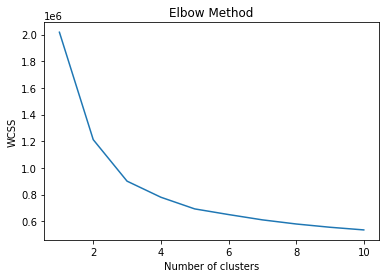

In [41]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_clustering_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [42]:
data = df_clustering_scaled.values

som_size = 30
som = MiniSom(som_size, som_size, data.shape[1], sigma=1.0, learning_rate=0.5)
som.train_random(data, 10000)

weights = som.get_weights()

flattened_weights = weights.reshape(-1, weights.shape[-1])

kmeans = KMeans(n_clusters=3, random_state = 42)
clusters = kmeans.fit_predict(flattened_weights)

clusters = clusters.reshape(som_size, som_size)

In [43]:
winners = np.array([som.winner(x) for x in data])

for i in range(3): 
    mask = clusters[winners[:,0], winners[:,1]] == i
    cluster_data = data[mask]
    
    cluster_profile = cluster_data.mean(axis=0)
    print(f"Perfil del cluster {i}: {cluster_profile}")

Perfil del cluster 0: [-0.32951088 -0.33702697 -0.34235488 -0.33772137 -0.33585135 -0.34537648
 -0.34389495 -0.34035208 -0.34026896 -0.34009726 -0.33941287 -0.33754122
 -0.3424957  -0.33517084 -0.33399277 -0.33112814 -0.33078586 -0.32667847
 -0.32462216 -0.32593224 -0.33168876 -0.33318316 -0.33399846 -0.33322211
 -0.33264941 -0.3355487  -0.34352209 -0.33942536 -0.34675466 -0.34310242
 -0.34353064 -0.3412169  -0.34180524 -0.34502139 -0.34562351 -0.34111396
 -0.34200951 -0.33617873 -0.33697614 -0.34147507 -0.34318602 -0.33576267
 -0.33281307 -0.33371045 -0.33524537 -0.3337806  -0.32724014 -0.31883511
 -0.31729346 -0.32408992 -0.32380395 -0.32404455 -0.32405026 -0.32360851
 -0.33095317 -0.33109894 -0.33426876 -0.33418635 -0.33461821 -0.33544453
 -0.33582978 -0.33684939 -0.33706855 -0.33570832 -0.33897444 -0.33771211
 -0.33625168 -0.33630434 -0.33881969 -0.3251902  -0.32110466 -0.32866679
 -0.33099295 -0.3364204  -0.33384703 -0.33858136 -0.3384044  -0.33952378
 -0.34063398 -0.34039168 -0.3

In [44]:
neuron_to_cluster = {}
for i in range(som_size):
    for j in range(som_size):
        neuron_to_cluster[(i,j)] = clusters[i][j]

In [45]:
client_to_neuron = {}
for i, x in enumerate(data):
    winner = som.winner(x)
    client_to_neuron[i] = winner

In [46]:
client_to_cluster = {client: neuron_to_cluster[neuron] for client, neuron in client_to_neuron.items()}

In [47]:
current_index = df_clustering_scaled.index
df_clustering_scaled = df_clustering_scaled.reset_index()
df_clustering_scaled['cluster'] = pd.Series(client_to_cluster)
df_clustering_scaled = df_clustering_scaled.set_index(current_index)
df_clustering_scaled = df_clustering_scaled.drop('LCLid', axis = 1)

In [48]:
df_clustering_final = df_clustering_scaled['cluster']
df_clustering_final.value_counts()

0    4379
1     968
2     181
Name: cluster, dtype: int64

In [50]:
df_clustering_scaled

day,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00,2013-01-07 00:00:00,2013-01-08 00:00:00,2013-01-09 00:00:00,2013-01-10 00:00:00,...,2013-12-23 00:00:00,2013-12-24 00:00:00,2013-12-25 00:00:00,2013-12-26 00:00:00,2013-12-27 00:00:00,2013-12-28 00:00:00,2013-12-29 00:00:00,2013-12-30 00:00:00,2013-12-31 00:00:00,cluster
LCLid,,,,,,,,,,,,,,,,,,,,,
MAC000002,-0.100562,0.121649,-0.134846,-0.159774,-0.053210,-0.205771,-0.220057,0.041673,0.400032,-0.119994,...,-0.493063,-0.666061,-0.619413,-0.601437,-0.226643,0.219427,0.281586,0.314836,0.174287,0
MAC000003,0.675476,0.750750,1.245087,0.984183,1.041463,2.666938,2.844275,2.957664,0.847378,2.572326,...,-0.158039,2.068628,1.700828,1.712939,1.809725,-0.075310,-0.197171,-0.097718,-0.169587,1
MAC000004,-0.985464,-0.950461,-0.991866,-0.996187,-1.013888,-1.026809,-1.000642,-0.965923,-0.978226,-0.940788,...,-0.961459,-0.942071,-0.853769,-0.848544,-0.895771,-0.898935,-0.929754,-0.939197,-0.916322,0
MAC000005,-0.732523,-0.594096,-0.637340,-0.538171,-0.636432,-0.094514,-0.593805,-0.761289,-0.634348,-0.621646,...,-0.674993,-0.623096,-0.269311,-0.727647,-0.425364,-0.540564,-0.816191,-0.639338,-0.611342,0
MAC000006,-1.108022,-1.084192,-1.117874,-1.125310,-1.125969,-1.159187,-1.112068,-0.954622,-0.828466,-0.693611,...,-0.766004,-0.708467,-0.595770,-0.668505,-0.745480,-0.801578,-0.803024,-0.699896,-0.787841,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MAC005561,-0.286502,-0.358277,-0.523440,-0.378933,-0.302702,-0.329973,-0.217964,-0.019514,-0.333404,-0.171345,...,0.019476,-0.203617,0.263086,-0.001656,-0.197203,-0.182098,-0.030210,-0.188934,-0.261662,0
MAC005562,-0.096551,-0.214845,-0.317907,-0.177926,-0.239877,-0.311965,-0.249359,-0.382969,-0.320891,-0.315274,...,0.121008,1.177551,0.154346,0.153472,0.264935,-0.061783,0.267870,0.611478,0.487470,0
MAC005564,-0.675107,-0.648153,-0.756370,-0.741757,-0.825009,-0.714746,-0.809383,-0.639119,-0.601080,-0.749978,...,-0.646440,-0.491863,-0.636209,-0.647862,-0.582469,-0.749947,-0.765627,-0.783637,-0.676412,0


In [51]:
date_columns = df_clustering_scaled.columns[:-1].astype('datetime64[ns]').date
df_clustering_scaled = df_clustering_scaled.set_axis(list(date_columns) + ['cluster'], axis=1, inplace=False)

In [52]:
df_clustering_scaled

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06,2013-01-07,2013-01-08,2013-01-09,2013-01-10,...,2013-12-23,2013-12-24,2013-12-25,2013-12-26,2013-12-27,2013-12-28,2013-12-29,2013-12-30,2013-12-31,cluster
LCLid,,,,,,,,,,,,,,,,,,,,,
MAC000002,-0.100562,0.121649,-0.134846,-0.159774,-0.053210,-0.205771,-0.220057,0.041673,0.400032,-0.119994,...,-0.493063,-0.666061,-0.619413,-0.601437,-0.226643,0.219427,0.281586,0.314836,0.174287,0
MAC000003,0.675476,0.750750,1.245087,0.984183,1.041463,2.666938,2.844275,2.957664,0.847378,2.572326,...,-0.158039,2.068628,1.700828,1.712939,1.809725,-0.075310,-0.197171,-0.097718,-0.169587,1
MAC000004,-0.985464,-0.950461,-0.991866,-0.996187,-1.013888,-1.026809,-1.000642,-0.965923,-0.978226,-0.940788,...,-0.961459,-0.942071,-0.853769,-0.848544,-0.895771,-0.898935,-0.929754,-0.939197,-0.916322,0
MAC000005,-0.732523,-0.594096,-0.637340,-0.538171,-0.636432,-0.094514,-0.593805,-0.761289,-0.634348,-0.621646,...,-0.674993,-0.623096,-0.269311,-0.727647,-0.425364,-0.540564,-0.816191,-0.639338,-0.611342,0
MAC000006,-1.108022,-1.084192,-1.117874,-1.125310,-1.125969,-1.159187,-1.112068,-0.954622,-0.828466,-0.693611,...,-0.766004,-0.708467,-0.595770,-0.668505,-0.745480,-0.801578,-0.803024,-0.699896,-0.787841,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MAC005561,-0.286502,-0.358277,-0.523440,-0.378933,-0.302702,-0.329973,-0.217964,-0.019514,-0.333404,-0.171345,...,0.019476,-0.203617,0.263086,-0.001656,-0.197203,-0.182098,-0.030210,-0.188934,-0.261662,0
MAC005562,-0.096551,-0.214845,-0.317907,-0.177926,-0.239877,-0.311965,-0.249359,-0.382969,-0.320891,-0.315274,...,0.121008,1.177551,0.154346,0.153472,0.264935,-0.061783,0.267870,0.611478,0.487470,0
MAC005564,-0.675107,-0.648153,-0.756370,-0.741757,-0.825009,-0.714746,-0.809383,-0.639119,-0.601080,-0.749978,...,-0.646440,-0.491863,-0.636209,-0.647862,-0.582469,-0.749947,-0.765627,-0.783637,-0.676412,0


In [53]:
indices = df_clustering_scaled.index

df_consumo = df_clustering_scaled.iloc[:, :-1]
df_consumo_rescaled = scaler.inverse_transform(df_consumo)
df_consumo_rescaled = pd.DataFrame(df_consumo_rescaled, columns=df_consumo.columns, index=indices)

df_cluster = df_clustering_scaled.iloc[:, -1:]
df_clustering_rescaled = pd.concat([df_consumo_rescaled, df_cluster], axis=1)

In [54]:
df_clustering_rescaled

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06,2013-01-07,2013-01-08,2013-01-09,2013-01-10,...,2013-12-23,2013-12-24,2013-12-25,2013-12-26,2013-12-27,2013-12-28,2013-12-29,2013-12-30,2013-12-31,cluster
LCLid,,,,,,,,,,,,,,,,,,,,,
MAC000002,10.800,13.300,10.074,9.857,11.171,10.293,9.439,11.640,15.259,10.740,...,6.721,4.781,4.650,4.706,9.122,13.658,14.982,15.082,13.746,0
MAC000003,18.734,19.980,23.522,20.949,22.061,39.806,40.185,40.282,19.656,40.258,...,10.288,34.059,33.797,31.277,31.533,10.564,9.746,10.722,10.015,1
MAC000004,1.753,1.916,1.722,1.747,1.614,1.858,1.607,1.743,1.712,1.741,...,1.734,1.826,1.706,1.869,1.758,1.918,1.734,1.829,1.913,0
MAC000005,4.339,5.700,5.177,6.188,5.369,11.436,5.689,3.753,5.092,5.240,...,4.784,5.241,9.048,3.257,6.935,5.680,2.976,4.998,5.222,0
MAC000006,0.500,0.496,0.494,0.495,0.499,0.498,0.489,1.854,3.184,4.451,...,3.815,4.327,4.947,3.936,3.412,2.940,3.120,4.358,3.307,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MAC005561,8.899,8.204,6.287,7.732,8.689,9.017,9.460,11.039,8.050,10.177,...,12.178,9.732,15.736,11.592,9.446,9.443,11.572,9.758,9.016,0
MAC005562,10.841,9.727,8.290,9.681,9.314,9.202,9.145,7.469,8.173,8.599,...,13.259,24.519,14.370,13.373,14.532,10.706,14.832,18.217,17.144,0
MAC005564,4.926,5.126,4.017,4.214,3.493,5.064,3.526,4.953,5.419,3.833,...,5.088,6.646,4.439,4.173,5.206,3.482,3.529,3.473,4.516,0


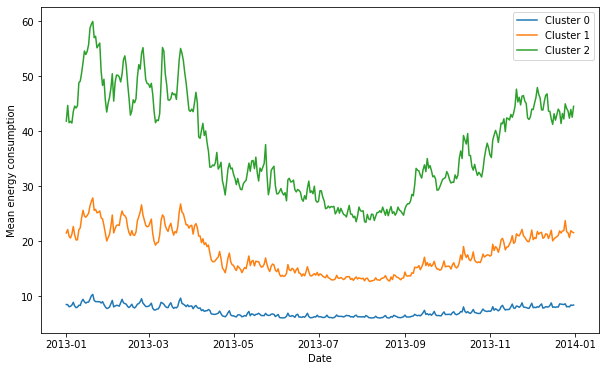

In [56]:
plt.figure(figsize=(10, 6))
clust = df_clustering_rescaled['cluster'].unique()
for cluster in clust:
    df_cluster = df_clustering_rescaled[df_clustering_rescaled['cluster'] == cluster]
    mean_profile = df_cluster.loc[:, df_cluster.columns != 'cluster'].mean(axis=0)
    plt.plot(mean_profile, label=f'Cluster {cluster}')

plt.xlabel('Date')
plt.ylabel('Mean energy consumption')
plt.legend()
plt.show()